In [1]:
import sys
sys.path.append("../..") 

In [2]:
from models.Fed import FedAvg
from models.Nets import MLP

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
import pickle
import os
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
cols = [ 'expiration_id', 'protocol', 'src_port', 'dst_port',
       'ip_version',   'bidirectional_duration_ms', 'bidirectional_packets',
       'bidirectional_bytes', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps',
       'src2dst_min_ps', 'src2dst_mean_ps', 'src2dst_stddev_ps',
       'src2dst_max_ps', 'dst2src_min_ps', 'dst2src_mean_ps',
       'dst2src_stddev_ps', 'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms',
       'src2dst_max_piat_ms', 'dst2src_min_piat_ms',
       'dst2src_mean_piat_ms', 'dst2src_stddev_piat_ms',
       'dst2src_max_piat_ms', 'bidirectional_syn_packets', 'bidirectional_ack_packets',
       'bidirectional_psh_packets', 'bidirectional_rst_packets',
       'bidirectional_fin_packets', 'src2dst_syn_packets', 'src2dst_ack_packets',
       'src2dst_psh_packets', 'src2dst_rst_packets',
       'src2dst_fin_packets', 'dst2src_syn_packets', 'dst2src_ack_packets',
       'dst2src_psh_packets', 'dst2src_rst_packets',
       'dst2src_fin_packets','application_name',
       'application_category_name', 'application_is_guessed',
       'application_confidence', 'content_type', 'udps.num_pkts_up_to_128_bytes',
       'udps.num_pkts_128_to_256_bytes', 'udps.num_pkts_256_to_512_bytes',
       'udps.num_pkts_512_to_1024_bytes',
       'udps.num_pkts_1024_to_1514_bytes', 'udps.min_ttl', 'udps.max_ttl',
       'udps.min_ip_pkt_len', 'udps.max_ip_pkt_len', 'udps.src2dst_flags',
       'udps.dst2src_flags', 'udps.tcp_flags', 'udps.tcp_win_max_in',
       'udps.tcp_win_max_out', 'udps.icmp_type', 'udps.icmp_v4_type',
       'udps.dns_query_id', 'udps.dns_query_type', 'udps.dns_ttl_answer',
       'udps.ftp_command_ret_code', 'udps.retransmitted_in_packets',
       'udps.retransmitted_out_packets', 'udps.retransmitted_in_bytes',
       'udps.retransmitted_out_bytes', 'udps.src_to_dst_second_bytes',
       'udps.dst_to_src_second_bytes', 'udps.src_to_dst_avg_throughput',
       'udps.dst_to_src_avg_throughput', 'udps.src_to_dst_second_bytes2',
       'udps.dst_to_src_second_bytes2', 'udps.src_to_dst_avg_throughput2',
       'udps.dst_to_src_avg_throughput2', 'udps.tcp_init_ms',
       'udps.tcp_synack_ack_ms', 'udps.tcp_half_closed_time_ms',
       'udps.num_pkts_after_termination',
       'udps.src2dst_first_packet_payload_len',
       'udps.dst2src_first_packet_payload_len',
       'udps.bidirectional_transport_bytes',
       'udps.bidirectional_payload_bytes', 'udps.src2dst_transport_bytes',
       'udps.src2dst_payload_bytes', 'udps.dst2src_transport_bytes',
       'udps.dst2src_payload_bytes',
       'udps.src2dst_most_freq_payload_ratio',
       'udps.src2dst_most_freq_payload_len',
       'udps.dst2src_most_freq_payload_ratio',
       'udps.dst2src_most_freq_payload_len',
       'udps.bidirectional_mean_packet_relative_times',
       'udps.bidirectional_stddev_packet_relative_times',
       'udps.bidirectional_variance_packet_relative_times',
       'udps.bidirectional_coeff_of_var_packet_relative_times',
       'udps.bidirectional_skew_from_median_packet_relative_times',
       'udps.src2dst_mean_packet_relative_times',
       'udps.src2dst_stddev_packet_relative_times',
       'udps.src2dst_variance_packet_relative_times',
       'udps.src2dst_coeff_of_var_packet_relative_times',
       'udps.src2dst_skew_from_median_packet_relative_times',
       'udps.dst2src_mean_packet_relative_times',
       'udps.dst2src_stddev_packet_relative_times',
       'udps.dst2src_variance_packet_relative_times',
       'udps.dst2src_coeff_of_var_packet_relative_times',
       'udps.dst2src_skew_from_median_packet_relative_times',
       'udps.min_req_res_time_diff', 'udps.max_req_res_time_diff',
       'udps.mean_req_res_time_diff', 'udps.stddev_req_res_time_diff',
       'udps.variance_req_res_time_diff',
       'udps.coeff_of_var_req_res_time_diff',
       'udps.skew_from_median_req_res_time_diff',
       'udps.src2dst_small_packet_payload_packets',
       'udps.src2dst_small_packet_payload_ratio',
       'udps.dst2src_small_packet_payload_packets',
       'udps.dst2src_small_packet_payload_ratio',
       'udps.sent_recv_packet_ratio',
       'udps.bidirectional_ps_first_quartile',
       'udps.bidirectional_ps_second_quartile',
       'udps.bidirectional_ps_third_quartile',
       'udps.bidirectional_ps_median_absoulte_deviation',
       'udps.bidirectional_ps_skewness', 'udps.bidirectional_ps_kurtosis',
       'udps.bidirectional_piat_first_quartile',
       'udps.bidirectional_piat_second_quartile',
       'udps.bidirectional_piat_third_quartile',
       'udps.bidirectional_piat_median_absoulte_deviation',
       'udps.bidirectional_piat_skewness',
       'udps.bidirectional_piat_kurtosis',
       'udps.median_req_res_time_diff', 'Attack']

In [5]:
def port_feature(port):
    if port < 1024:
        return 1
    elif port < 49152 and port >= 1024:
        return 2
    else:
        return 3        

In [6]:
def encode(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    les = {}
    for each in cols:
        le_col = LabelEncoder()
        df[each] = le_col.fit_transform(df[each])
        les[each] = le_col
       
    return df, les


In [7]:
def save_predictions(predictions, targets, timeout, save_path= "results/MLP"):
    name_file_pred = 'predictions_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"
    name_file_y = 'targets_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"

    pickle.dump(predictions, open(os.path.join(save_path, name_file_pred), 'wb') )
    pickle.dump(targets, open(os.path.join(save_path, name_file_y), 'wb') )
    
def load_predictions(timeout, save_path= "results/MLP"):
    name_file_pred = 'predictions_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"
    name_file_y = 'targets_idle_' + str(timeout[0]) + "_active_" + str(timeout[1]) + ".p"
    
    predictions =  pickle.load(open(os.path.join(save_path, name_file_pred), 'rb') )
    targets =  pickle.load(open(os.path.join(save_path, name_file_y), 'rb') )
    return predictions, targets

In [8]:
timeouts = [(0.5,2), (1, 2), (2,2), (0.5,3), (1,3), (2, 3), (3,3), (0.5,4), (1, 4), (2,4), (3,4), (4,4), (0.5,5), (1,5), (2,5), (3,5), (4,5), (5,5), (0.5, 30), (1, 30), (2,30), (3,30), (4,30), (5,30), (10, 30), (0.5, 60), (1, 60), (2,60), (3,60), (4,60), (5,60), (10, 60)]

In [9]:
def split_data(data):
    train_idx, test_idx = next(StratifiedKFold(n_splits=3).split(data, data['Attack']))
    train, test = data.iloc[train_idx].reset_index(drop=True), data.iloc[test_idx].reset_index(drop=True)
    return train, test

In [10]:
from configs.net_config import MLPConfig
import torch

config = MLPConfig()

In [11]:
gpu = 3
config.device = torch.device('cuda:{}'.format(gpu) if torch.cuda.is_available() and gpu != -1 else 'cpu')
seed=config.seed
iid=config.iid
config.dataset= "unsw"
all_clients = config.all_clients
config.epochs=10
config.local_ep=5
print("Dataset: {}, Model: {}, IID: {}, Data Type : {}, Device : {} ".format(config.dataset, config.model, iid, config.data_type, config.device))

Dataset: unsw, Model: MLP, IID: True, Data Type : tabular, Device : cuda:3 


In [12]:
# build model
classes =  ['Analysis', 'Backdoors', 'Benign', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']

if config.model == 'MLP' and config.dataset == 'unsw' and config.data_type == "tabular":
    net_glob = MLP(num_features=57, hidden1_size=32, hidden2_size=16, num_classes=len(classes)).to(config.device) 
else:
    exit('Error: unrecognized model')
print(net_glob)

MLP(
  (fc1): Linear(in_features=57, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=16, out_features=10, bias=True)
)


# Preprocessing 

In [13]:
import copy

preprocessing=False
if preprocessing:
    for timeout in timeouts:
        print("Processing timeout : ", timeout)
        idle, active = timeout
        out_dir = f'/home/meryem.janati/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/janati/IDS/project2/extractions/extractions/new_idle_{idle}min_active_{active}min/UNSW-NB15'
        df = pd.read_csv(out_dir+"/UNSW-NB15.csv")

        df = df[~df.Attack.str.contains('direction_flip')]
        df = df.sort_values(by=['bidirectional_last_seen_ms']).reset_index(drop=True)
        df_new = df[cols]
        df_new['application_name'] = df_new['application_name'].apply(lambda x: x.split(".")[0])
        df_new['content_type'] = df_new['content_type'].fillna("unkown/unkown")
        df_new['content_sub_type'] = df_new['content_type'].apply(lambda x: x.split("/")[1])
        df_new['content_type'] = df_new['content_type'].apply(lambda x: x.split("/")[0])
        #df_new['src_port'] = df_new['src_port'].apply(lambda x: port_feature(x))
        #df_new['dst_port'] = df_new['dst_port'].apply(lambda x: port_feature(x))
        df_new = df_new.fillna(0)
        categ_cols = ["application_name", "application_category_name", "content_sub_type", "content_type" ]
        df_new, lbl_encoders = encode(df_new,categ_cols)    
        train, test = split_data(df_new)
        y_train = train['Attack']
        X_train = train.drop('Attack', axis=1)
        y_test = test['Attack']
        X_test = test.drop('Attack', axis=1)
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
        y_test = le.transform(y_test)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        print("Saving data for timeout: ", timeout)
        np.save(os.path.join('../../data/UNSW-NB15/baselineFeatures/X_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), X_train)
        np.save(os.path.join('../../data/UNSW-NB15/baselineFeatures/y_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), y_train)
        np.save(os.path.join('../../data/UNSW-NB15/baselineFeatures/X_test_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), X_test)
        np.save(os.path.join('../../data/UNSW-NB15/baselineFeatures/y_test_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), y_test)

## Training

In [14]:
from models.Update import LocalUpdate
import copy

def FL_training():
    #net_glob = MLP(dim_in=46, dim_hidden=32, dim_out=le.classes_).to(config.device) 
    net_glob.train()
    # copy weights
    w_glob = net_glob.state_dict()
    print("Training ... ")
    net_loss_train = []


    if config.all_clients: 
        print("Aggregation over all clients")
        w_net_locals = [w_glob for i in range(config.num_users)]

    for iter in range(config.epochs):
        net_loss_locals = []
        X_train, y_train = None, None
        if not config.all_clients:
            w_net_locals = []
        m = max(int(config.frac * config.num_users), 1)
        idxs_timeouts = np.random.choice(range(config.num_users), m, replace=False)
        for idx in idxs_timeouts:
            timeout = timeouts[idx]
            X_train = np.load(os.path.join('../../data/UNSW-NB15/baselineFeatures/X_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
            y_train = np.load(os.path.join('../../data/UNSW-NB15/baselineFeatures/y_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
            
            local = LocalUpdate(config=config, x_train=X_train, y_train=y_train)
            w_net, net_loss = local.train_net(net=copy.deepcopy(net_glob).to(config.device), timeout=timeout)

            w_net = w_net.state_dict()
            if config.all_clients:
                w_net_locals[idx] = copy.deepcopy(w_net)
            else:
                w_net_locals.append(copy.deepcopy(w_net))

            net_loss_locals.append(copy.deepcopy(net_loss))
        # update global weights
        w_glob = FedAvg(w_net_locals)

        # copy weight to net_glob
        net_glob.load_state_dict(w_glob)

        # print loss
        net_loss_avg = sum(net_loss_locals) / len(net_loss_locals)
        print('Round {:3d}, Average MLP loss {:.3f}'.format(iter, net_loss_avg))
        net_loss_train.append(net_loss_avg)

    #save_model(config.local_ep, net_glob, filepath) 
FL_training()

Training ... 
Timeout : (3, 5) 	Local Epoch : 0 	Loss: 0.073379
Timeout : (3, 5) 	Local Epoch : 1 	Loss: 0.046350
Timeout : (3, 5) 	Local Epoch : 2 	Loss: 0.043927
Timeout : (3, 5) 	Local Epoch : 3 	Loss: 0.042652
Timeout : (3, 5) 	Local Epoch : 4 	Loss: 0.041703
Timeout : (4, 4) 	Local Epoch : 0 	Loss: 0.072415
Timeout : (4, 4) 	Local Epoch : 1 	Loss: 0.045561
Timeout : (4, 4) 	Local Epoch : 2 	Loss: 0.043368
Timeout : (4, 4) 	Local Epoch : 3 	Loss: 0.042287
Timeout : (4, 4) 	Local Epoch : 4 	Loss: 0.041527
Timeout : (5, 60) 	Local Epoch : 0 	Loss: 0.072737
Timeout : (5, 60) 	Local Epoch : 1 	Loss: 0.045660
Timeout : (5, 60) 	Local Epoch : 2 	Loss: 0.043383
Timeout : (5, 60) 	Local Epoch : 3 	Loss: 0.042184
Timeout : (5, 60) 	Local Epoch : 4 	Loss: 0.041239
Timeout : (1, 4) 	Local Epoch : 0 	Loss: 0.073746
Timeout : (1, 4) 	Local Epoch : 1 	Loss: 0.046974
Timeout : (1, 4) 	Local Epoch : 2 	Loss: 0.044116
Timeout : (1, 4) 	Local Epoch : 3 	Loss: 0.042887
Timeout : (1, 4) 	Local Epoch :

# Testing the global model on the combined test set of all clients

In [15]:
X_test, y_test = None, None
all_accuracy, all_f1Score, all_recall, all_precision = {}, {}, {}, {}

for i, timeout in enumerate(timeouts):
    if i == 0:
        X_test = np.load(os.path.join('../../data/UNSW-NB15/baselineFeatures/X_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
        y_test = np.load(os.path.join('../../data/UNSW-NB15/baselineFeatures/y_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
    else:
        X = np.load(os.path.join('../../data/UNSW-NB15/baselineFeatures/X_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
        y = np.load(os.path.join('../../data/UNSW-NB15/baselineFeatures/y_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
        X_test = np.concatenate((X_test, X), axis=0)
        y_test = np.concatenate((y_test, y), axis=0)

In [16]:
X_test.shape, y_test.shape

((43700498, 57), (43700498,))

In [17]:
#from models.evaluate import get_thr #,evaluate_ae
import numpy as np
from sklearn.metrics import classification_report
import torch.nn as nn
import torch
from torch.utils.data import DataLoader, TensorDataset
import tqdm

# ------------------ Start Testing ----------------------#
print("Testing ... ")
test_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, drop_last=True)


def test(config, model, test_loader):


    model.eval()

    history = {
        'test': {
            'total': 0,
            'loss': 0.0,
            'accuracy': 0.0,
            'output_pred': [],
            'output_true': [],
            'output_pred_prob': []
        }
    }

    test_loss = 0.0
    test_steps = 0
    test_total = 0
    test_correct = 0

    test_output_pred = []
    test_output_true = []
    test_output_pred_prob = []
    
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs, labels = inputs.to(config.device), labels.type(torch.LongTensor).to(config.device)
            #labels = labels.squeeze(1)

            outputs = model(inputs)
            
            loss = criterion(outputs, labels)
            test_loss += loss.cpu().item()
            test_steps += 1

            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

            test_output_pred += outputs.argmax(1).cpu().tolist()
            test_output_true += labels.tolist()
            test_output_pred_prob += nn.functional.softmax(outputs, dim=0).cpu().tolist()

    history['test']['total'] = test_total
    history['test']['loss'] = test_loss/test_steps
    history['test']['accuracy'] = test_correct/test_total
    history['test']['output_pred'] = test_output_pred
    history['test']['output_true'] = test_output_true
    history['test']['output_pred_prob'] = test_output_pred_prob

    return history

history=test(config, net_glob, test_loader)

Testing ... 


In [18]:
test_output_true = history['test']['output_true']
test_output_pred = history['test']['output_pred']
test_output_pred_prob = history['test']['output_pred_prob']


print("Testing Set -- Classification Report", end="\n\n")
print(classification_report(test_output_true, test_output_pred, target_names=classes))

Testing Set -- Classification Report

                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00      6564
     Backdoors       0.68      0.19      0.29      7424
        Benign       0.99      1.00      0.99  42377971
           DoS       0.56      0.06      0.11     73984
      Exploits       0.75      0.81      0.78    481996
       Fuzzers       0.65      0.30      0.41    393741
       Generic       0.70      0.65      0.67     77796
Reconnaissance       0.82      0.90      0.86    245413
     Shellcode       0.59      0.71      0.64     32226
         Worms       0.00      0.00      0.00      3365

      accuracy                           0.99  43700480
     macro avg       0.58      0.46      0.48  43700480
  weighted avg       0.98      0.99      0.98  43700480



In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve


acc = accuracy_score(test_output_true, test_output_pred)
precision = precision_score(test_output_true, test_output_pred, average='macro')
recall = recall_score(test_output_true, test_output_pred, average='macro')
f1Score = f1_score(test_output_true, test_output_pred, average='macro')

print('\nAccuracy: {:.4f}\n'.format(acc))

print('Macro Precision: {:.4f}'.format(precision))
print('Macro Recall: {:.4f}'.format(recall))
print('Macro F1-score: {:.4f}\n'.format(f1Score))

all_accuracy["all_test_sets"] = acc
all_precision["all_test_sets"] = precision
all_recall["all_test_sets"] = recall
all_f1Score["all_test_sets"] = f1Score




Accuracy: 0.9852

Macro Precision: 0.5758
Macro Recall: 0.4610
Macro F1-score: 0.4767



# Testing the global model on the each client seperatly

In [20]:
X_test, y_test = None, None
for i, timeout in enumerate(timeouts):
    X_test = np.load(os.path.join('../../data/UNSW-NB15/baselineFeatures/X_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
    y_test = np.load(os.path.join('../../data/UNSW-NB15/baselineFeatures/y_train_'+ str(timeout[0])+ str('-') + str(timeout[1])+ '.npy'), mmap_mode='r')
    test_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test))
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, drop_last=True)
    
    history=test(config, net_glob, test_loader)

    test_output_true = history['test']['output_true']
    test_output_pred = history['test']['output_pred']
    test_output_pred_prob = history['test']['output_pred_prob']

    all_accuracy[str(timeout)] = accuracy_score(test_output_true, test_output_pred)
    all_f1Score[str(timeout)] = f1_score(test_output_true, test_output_pred, average='macro')  
    all_precision[str(timeout)] = precision_score(test_output_true, test_output_pred, average='macro')
    all_recall[str(timeout)] = recall_score(test_output_true, test_output_pred, average='macro')
    
    print("Timenout : {} \tAccuracy={:.4f} \tF1_score={:.4f}".format(timeout, all_accuracy[str(timeout)], all_f1Score[str(timeout)]))

Timenout : (0.5, 2) 	Accuracy=0.9834 	F1_score=0.4312
Timenout : (1, 2) 	Accuracy=0.9851 	F1_score=0.4581
Timenout : (2, 2) 	Accuracy=0.9860 	F1_score=0.4838
Timenout : (0.5, 3) 	Accuracy=0.9834 	F1_score=0.4302
Timenout : (1, 3) 	Accuracy=0.9851 	F1_score=0.4565
Timenout : (2, 3) 	Accuracy=0.9860 	F1_score=0.4846
Timenout : (3, 3) 	Accuracy=0.9861 	F1_score=0.4947
Timenout : (0.5, 4) 	Accuracy=0.9833 	F1_score=0.4290
Timenout : (1, 4) 	Accuracy=0.9850 	F1_score=0.4559
Timenout : (2, 4) 	Accuracy=0.9860 	F1_score=0.4847
Timenout : (3, 4) 	Accuracy=0.9861 	F1_score=0.4960
Timenout : (4, 4) 	Accuracy=0.9860 	F1_score=0.5015
Timenout : (0.5, 5) 	Accuracy=0.9832 	F1_score=0.4284
Timenout : (1, 5) 	Accuracy=0.9850 	F1_score=0.4552
Timenout : (2, 5) 	Accuracy=0.9860 	F1_score=0.4845
Timenout : (3, 5) 	Accuracy=0.9861 	F1_score=0.4966
Timenout : (4, 5) 	Accuracy=0.9860 	F1_score=0.5012
Timenout : (5, 5) 	Accuracy=0.9859 	F1_score=0.5016
Timenout : (0.5, 30) 	Accuracy=0.9828 	F1_score=0.4240
T

In [21]:
results = {"accuracy": all_accuracy, "f1Score":all_f1Score, "precision": all_precision, "recall":all_recall}

import json
with open('../../save/results/UNSW-NB15/{}_{}_E[{}]_R[{}].json'.format(config.dataset, config.model, config.local_ep,config.epochs), 'w') as f:
    json.dump(results, f)

['All', '(0.5,2)', '(1, 2)', '(2,2)', '(0.5,3)', '(1,3)', '(2, 3)', '(3,3)', '(0.5,4)', '(1, 4)', '(2,4)', '(3,4)', '(4,4)', '(0.5,5)', '(1,5)', '(2,5)', '(3,5)', '(4,5)', '(5,5)', '(0.5, 30)', '(1, 30)', '(2,30)', '(3,30)', '(4,30)', '(5,30)', '(10, 30)', '(0.5, 60)', '(1, 60)', '(2,60)', '(3,60)', '(4,60)', '(5,60)', '(10, 60)']


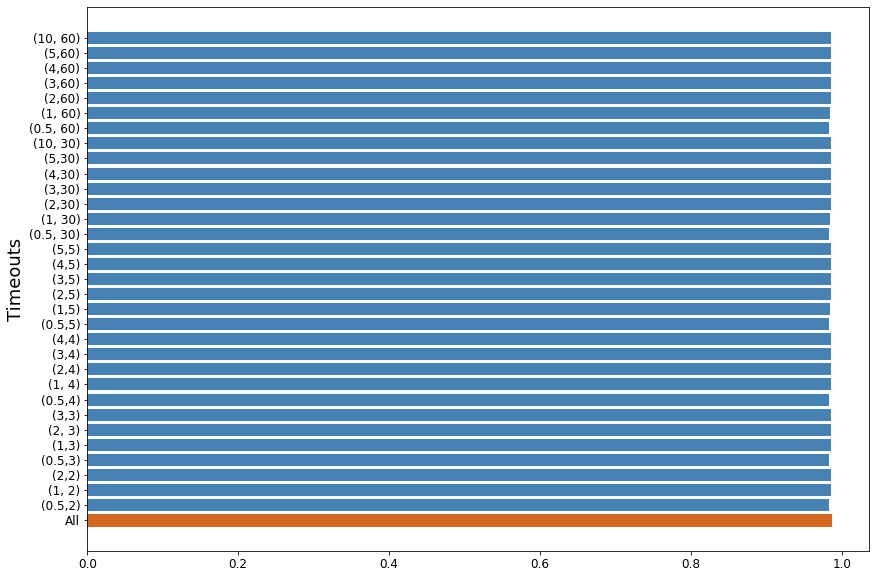

In [2]:
import matplotlib.pyplot as plt
import json
plt.figure(figsize=(14, 10))


load_json=True
if load_json:
    f = open('../../save/results/UNSW-NB15/addFeatures/unsw_MLP_E[5]_R[10].json')
    results = json.load(f)
    f.close()
    

time = timeouts = ["All", "(0.5,2)", "(1, 2)", "(2,2)","(0.5,3)", "(1,3)", "(2, 3)", "(3,3)", "(0.5,4)", "(1, 4)", "(2,4)", "(3,4)", "(4,4)", "(0.5,5)", "(1,5)", "(2,5)", "(3,5)",
                   "(4,5)", "(5,5)", "(0.5, 30)", "(1, 30)", "(2,30)", "(3,30)", "(4,30)", "(5,30)", "(10, 30)", "(0.5, 60)", "(1, 60)", "(2,60)", "(3,60)", "(4,60)", "(5,60)", "(10, 60)"]

acc= list(results["accuracy"].values())
print(time)

bars = plt.barh(time, acc, height = 0.8, color='steelblue')
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
bars[0].set_color('chocolate')
plt.ylabel('Timeouts', fontsize=18)
#plt.xlabel('Accuracy')
#plt.title('F1-score for each timeout')
#plt.grid(which="major", axis="both", linestyle='-', linewidth=0.5)
plt.savefig("../../save/plts/UNSW-NB15/FL_unsw_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()


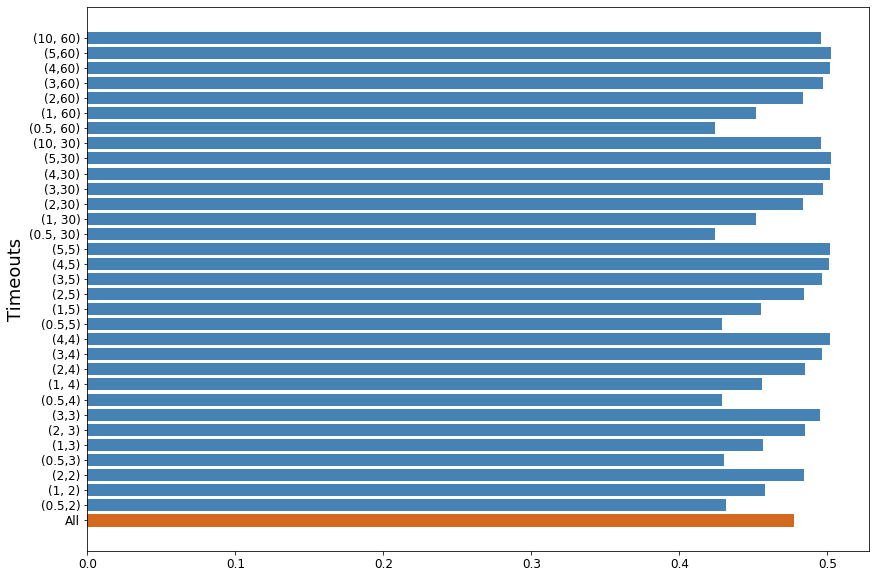

In [3]:
plt.figure(figsize=(14, 10))

f1_score= list(results["f1Score"].values())

bars = plt.barh(time, f1_score, height = 0.8, color='steelblue')
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
bars[0].set_color('chocolate')
plt.ylabel('Timeouts', fontsize=18)
#plt.xlabel('F1-score')
#plt.title('F1-score for each timeout')
#plt.grid(which="major", axis="both", linestyle='-', linewidth=0.5)
plt.savefig("../../save/plts/UNSW-NB15/FL_unsw_f1.pdf", format="pdf", bbox_inches="tight")
plt.show()